# Analysis on yahoo adjustmet close prices

## Initialization
The project initialization

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Set paths to data folders

In [2]:
dir_data_raw = os.path.join('..', '..', 'data_raw')
dir_data_processing = os.path.join('..', '..', 'data_processing')

### Get tickers DF

_set a path to the tickers.csv file._

In [3]:
#tickers_file = os.path.join(dir_data_processing, 'tickers', 'all_tickers.csv')

In [4]:
#tickers_df = pd.read_csv(tickers_file)

In [5]:
#tickers_df.head(3)

read ticker by ticker:
extend to have every day in the time frame 
create new dataframe with columns : every day in the time frame (string), adjusted coef = 1
merge 2 df
fill na
add new column date as timestamp, make it index

read dividends:
for every dividend update all entries <= date (timestamt)

read splits:
for every split update all adj coef  where <= date (timestamp)

update column adj close = close * adjusted coef


In [6]:
date_start = dt.datetime.strptime('2006-01-01', '%Y-%m-%d')
date_end = dt.datetime.strptime('2018-11-01', '%Y-%m-%d') 
max_daily_ratio = 1.5
min_daily_ratio = 0.5

In [7]:
dates_s = pd.date_range(start=date_start, end=date_end)
dates_df = pd.DataFrame({'Date': dates_s, 'Adj Coef': np.ones(len(dates_s))})

# todo remove
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 2 columns):
Date        4688 non-null datetime64[ns]
Adj Coef    4688 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 73.3 KB


In [8]:
#ticker = 'ACA_CAC'
#ticker = 'BARC_FTSE'
#ticker = 'BAS_DAX'
#ticker = 'DTE_DAX'
#ticker = 'IFX_DAX'
#ticker = 'LLOY_FTSE'
#ticker = 'RBS_FTSE'
ticker = 'DB1_DAX'

In [9]:
def get_yahoo_df(file):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    return df

In [10]:
def get_price_df(ticker):
    return get_yahoo_df(os.path.join(dir_data_raw, 'prices', 'yahoo', "%s.csv" % ticker))

In [11]:
def get_dividends_df(ticker):
    return get_yahoo_df(os.path.join(dir_data_raw, 'prices', 'yahoo_dividends', "%s.csv" % ticker))

In [12]:
def get_splits_df(ticker):
    return get_yahoo_df(os.path.join(dir_data_raw, 'prices', 'yahoo_splits', "%s.csv" % ticker))

In [13]:
price_df = get_price_df(ticker)
price_df.head()

,Adj Coef,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2006-01-01,1.0,86.849998,88.080002,86.650002,87.849998,58.091747,6600
2006-01-02,1.0,86.849998,88.080002,86.650002,87.849998,58.091747,6600
2006-01-03,1.0,88.699997,88.980003,86.889999,87.580002,57.913212,8700
2006-01-04,1.0,88.220001,88.220001,86.860001,87.070000,57.575970,7000
2006-01-05,1.0,86.790001,86.790001,86.129997,86.410004,57.139542,8000


In [14]:
dividends_df = get_dividends_df(ticker)
dividends_df.head()

,Dividends
Date,
2006-05-25,2.1
2007-05-14,3.4
2008-05-22,2.1
2009-05-21,2.1
2010-05-28,2.1


In [15]:
for index, row in dividends_df.iterrows():
    day = price_df.loc[index]
    f = (row['Dividends'] + day['Close']) / day['Close']
    price_df.loc[price_df.index < index, 'Adj Coef'] *= f

# todo remove
price_df.head()   

,Adj Coef,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2006-01-01,1.511264,86.849998,88.080002,86.650002,87.849998,58.091747,6600
2006-01-02,1.511264,86.849998,88.080002,86.650002,87.849998,58.091747,6600
2006-01-03,1.511264,88.699997,88.980003,86.889999,87.580002,57.913212,8700
2006-01-04,1.511264,88.220001,88.220001,86.860001,87.070000,57.575970,7000
2006-01-05,1.511264,86.790001,86.790001,86.129997,86.410004,57.139542,8000


In [16]:
splits_df = get_splits_df(ticker)
splits_df.head()

,Stock Splits
Date,


In [17]:
for index, row in splits_df.iterrows():
    day = price_df.loc[index]
    split_str = row['Stock Splits']
    new, old = map(float, split_str.split('/'))
    f = old / new
    price_df.loc[price_df.index < index, 'Adj Coef'] *= f

# todo remove
price_df.head()  

,Adj Coef,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2006-01-01,1.511264,86.849998,88.080002,86.650002,87.849998,58.091747,6600
2006-01-02,1.511264,86.849998,88.080002,86.650002,87.849998,58.091747,6600
2006-01-03,1.511264,88.699997,88.980003,86.889999,87.580002,57.913212,8700
2006-01-04,1.511264,88.220001,88.220001,86.860001,87.070000,57.575970,7000
2006-01-05,1.511264,86.790001,86.790001,86.129997,86.410004,57.139542,8000


## Plot yahoo close

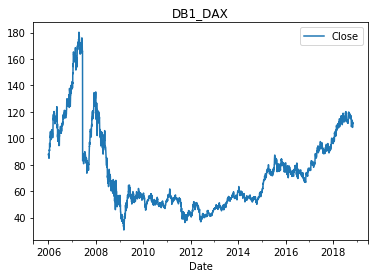

In [18]:
price_df.plot.line(use_index = True, y='Close', title=ticker)
plt.show()

## Plot quandl close

In [19]:
#priceq_file = os.path.join(dir_data_raw, 'prices', 'quandl', "%s.csv" % ticker)
#priceq_df = pd.read_csv(priceq_file)
#priceq_df['Date'] = pd.to_datetime(priceq_df['Date'])
#priceq_df.set_index('Date', inplace=True)
#priceq_df.plot.line(use_index = True, y='Last Close', title=t)
#plt.show()

## Plot daily ratio

In [20]:
def plot_daily_ration_on_column(df, column):
    prev_day = None
    price_ratios = [1]

    maximum = 0
    maximum_date = None
    minimum = 10
    minimum_date = None

    for i, day in df.iterrows():
        if prev_day is None:
            prev_day = day
            continue
        day_ratio = day[column] / prev_day[column] 

        if maximum < day_ratio:
            maximum = day_ratio
            maximum_date = i

        if minimum > day_ratio:
            minimum = day_ratio
            minimum_date = i

        price_ratios.append(day_ratio) 
        prev_day = day

    df['Ratio'] = pd.Series(price_ratios).values
    df.plot.line(use_index = True, y='Ratio', title=ticker)

    print("Max: %s, max_date %s" % (maximum, maximum_date))
    print("Min: %s, min_date %s" % (minimum, minimum_date))

    plt.show()

### Plot on Close

Max: 1.1875, max_date 2008-10-13 00:00:00
Min: 0.5054501564808764, min_date 2007-06-11 00:00:00


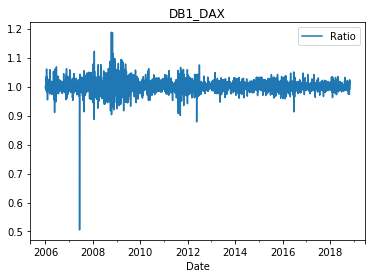

In [21]:
plot_daily_ration_on_column(price_df, 'Close')

### Plot on Adj Close

Max: 1.1875001204630935, max_date 2008-10-13 00:00:00
Min: 0.5054501937251574, min_date 2007-06-11 00:00:00


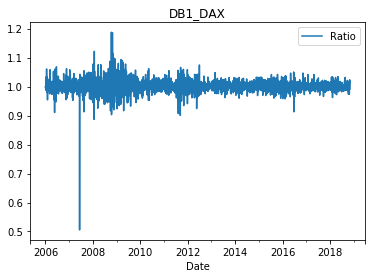

In [22]:

plot_daily_ration_on_column(price_df, 'Adj Close')

### Plot my adj close

Max: 1.1875, max_date 2008-10-13 00:00:00
Min: 0.5054501564808764, min_date 2007-06-11 00:00:00


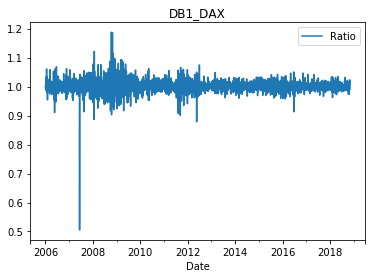

In [23]:
price_df['Adj My Close'] = price_df['Close'] / price_df['Adj Coef']
plot_daily_ration_on_column(price_df, 'Adj My Close')

In [24]:
price_df.head()

,Adj Coef,Open,High,Low,Close,Adj Close,Volume,Ratio,Adj My Close
Date,,,,,,,,,
2006-01-01,1.511264,86.849998,88.080002,86.650002,87.849998,58.091747,6600,1.000000,58.130135
2006-01-02,1.511264,86.849998,88.080002,86.650002,87.849998,58.091747,6600,1.000000,58.130135
2006-01-03,1.511264,88.699997,88.980003,86.889999,87.580002,57.913212,8700,0.996927,57.951479
2006-01-04,1.511264,88.220001,88.220001,86.860001,87.070000,57.575970,7000,0.994177,57.614012
2006-01-05,1.511264,86.790001,86.790001,86.129997,86.410004,57.139542,8000,0.992420,57.177294


In [25]:
price_df = price_df.drop(columns=['Ratio', 'Adj Close'])
price_df.rename(columns={'Adj My Close': 'Adj Close'}, inplace=True)

new_price_file = os.path.join(dir_data_raw, 'prices', 'ready', "%s.csv" % ticker)

price_df.to_csv(new_price_file)

price_df.head()

,Adj Coef,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2006-01-01,1.511264,86.849998,88.080002,86.650002,87.849998,6600,58.130135
2006-01-02,1.511264,86.849998,88.080002,86.650002,87.849998,6600,58.130135
2006-01-03,1.511264,88.699997,88.980003,86.889999,87.580002,8700,57.951479
2006-01-04,1.511264,88.220001,88.220001,86.860001,87.070000,7000,57.614012
2006-01-05,1.511264,86.790001,86.790001,86.129997,86.410004,8000,57.177294


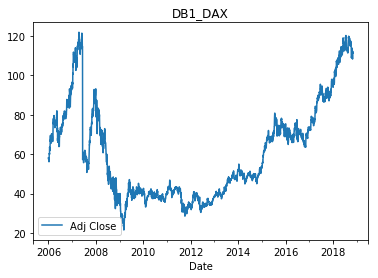

In [26]:
price_df.plot.line(use_index = True, y='Adj Close', title=ticker)
plt.show()